# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import time
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Data Preprocessing

### Drop column

In [3]:
df.drop(['id'], axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Cek Data Null

In [4]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'] = df['smoking_status'].replace(np.nan, 'unknown')

In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Encoding

In [8]:
df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)
df['ever_married'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Private', 'Self-employed'],[0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(['Rural', 'Urban'],[0, 1], inplace=True)
df['smoking_status'].replace(['unknown','never smoked', 'formerly smoked', 'smokes'],[0, 1, 2,3], inplace=True)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cek Data Duplikat

In [10]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [11]:
df.drop_duplicates(keep='last')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cleaning Outliers

In [12]:
column = ['age','avg_glucose_level','bmi']
df[column].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.638023
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,28.100000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


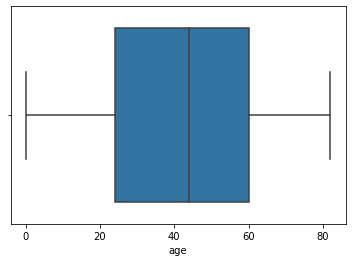

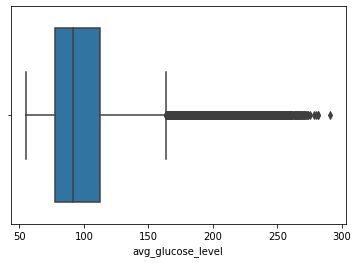

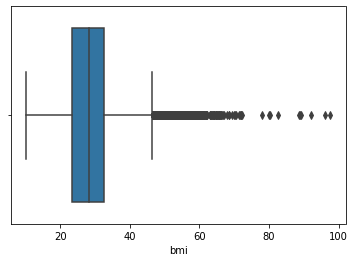

In [13]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

In [14]:
df = df[(df['bmi'] <= 54 )]
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000
mean,0.591159,42.201443,0.092933,0.047545,0.642855,2.733423,0.501334,104.341120,28.401391,1.167915,0.018114
std,0.492144,22.562909,0.290342,0.212804,0.479163,0.904601,0.500004,42.946278,7.215377,1.027503,0.133363
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.530000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.560000,28.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,111.960000,32.500000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,54.000000,3.000000,1.000000


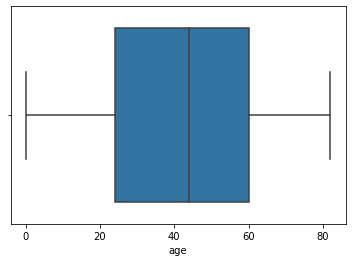

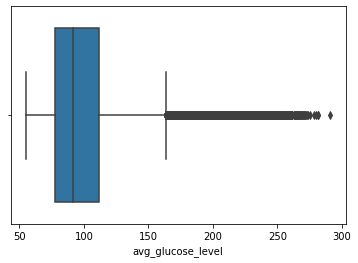

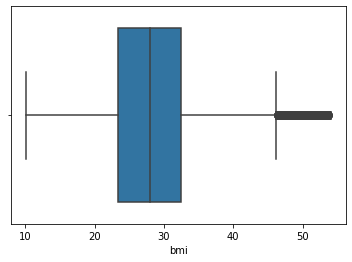

In [15]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

## Handling Imbalanced Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


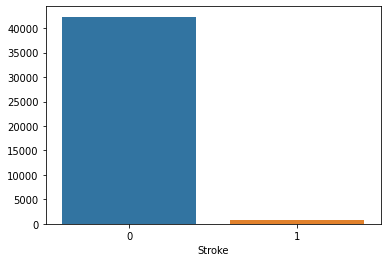

Tidak stroke (0) :  42336
Terkena stroke (1) :  781


In [16]:
xs = df['stroke'].value_counts().index
ys = df['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Stroke")
plt.show()
print("Tidak stroke (0) : ", str(ys[0]))
print("Terkena stroke (1) : ", str(ys[1]))

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0


## Split Dataset

In [18]:
x  = df[['gender','age','hypertension','heart_disease','ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi','smoking_status']]
y = df['stroke']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21019,0,34.0,0,0,1,2,1,124.47,36.7,1
41033,0,25.0,0,0,1,3,1,165.25,34.3,3
10335,1,65.0,0,0,1,3,1,103.72,25.8,1
9754,0,46.0,0,0,1,2,1,105.07,28.9,3
18348,1,48.0,0,0,1,3,0,84.18,40.1,0


In [21]:
x_train.shape

(34493, 10)

In [22]:
y_train.head()

21019    0
41033    0
10335    0
9754     0
18348    0
Name: stroke, dtype: int64

In [23]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
36607,1,47.0,0,0,1,3,1,80.87,21.5,1
32133,0,81.0,0,0,1,3,1,76.13,28.0,2
33663,0,27.0,0,0,0,3,1,102.36,33.7,1
42482,1,64.0,0,0,1,4,0,98.76,40.7,1
18599,1,69.0,0,0,1,2,0,96.29,33.7,0


In [24]:
y_train.value_counts()

0    33894
1      599
Name: stroke, dtype: int64

In [25]:
y_test.value_counts()

0    8442
1     182
Name: stroke, dtype: int64

In [26]:
import math

In [27]:
print(len(x_train))

34493


# Init

In [28]:
def init_weight_bias(units, hidden_layer, random_state=42):
    init_weight_bias.W = {}
    init_weight_bias.b = {}
    init_weight_bias.neuron_input = len(x_train.iloc[0])
    init_weight_bias.neuron_output = 1
    
    np.random.seed(random_state)
    
    for i in range(hidden_layer):
        init_weight_bias.W[i] = np.random.randn(init_weight_bias.neuron_input, units) * np.sqrt(1. / init_weight_bias.neuron_input)
        init_weight_bias.b[i] = np.zeros(units)
        init_weight_bias.neuron_input = units
    init_weight_bias.W[hidden_layer] = np.random.randn(units, init_weight_bias.neuron_output) * np.sqrt(1. / units)
    init_weight_bias.b[hidden_layer] = np.zeros(init_weight_bias.neuron_output)

    print(init_weight_bias.W)
    print("----")
    print(init_weight_bias.b)

In [29]:
init_weight_bias(10, 10)

{0: array([[ 0.15707481, -0.04372301,  0.2048171 ,  0.48162433, -0.0740458 ,
        -0.07404061,  0.49939094,  0.24268417, -0.14846084,  0.17157255],
       [-0.14654554, -0.14727668,  0.07651519, -0.60503234, -0.54546691,
        -0.17781093, -0.32028532,  0.09937373, -0.28714242, -0.44660964],
       [ 0.46347884, -0.07139674,  0.02135429, -0.45054494, -0.17214893,
         0.0350768 , -0.36397613,  0.11880615, -0.18993863, -0.09224166],
       [-0.19027634,  0.58574179, -0.0042682 , -0.33447756,  0.26011154,
        -0.38606466,  0.06604847, -0.61970211, -0.42000931,  0.06225299],
       [ 0.23352364,  0.05419141, -0.0365712 , -0.09521735, -0.46754971,
        -0.22763473, -0.14566677,  0.3342914 ,  0.10866164, -0.55752225],
       [ 0.10248435, -0.12177371, -0.21406153,  0.19342903,  0.32603068,
         0.29449663, -0.26538388, -0.09778154,  0.10475469,  0.30849446],
       [-0.1515282 , -0.05871052, -0.34985384, -0.37827375,  0.25694323,
         0.42888075, -0.0227716 ,  0.3173

# Activation Func

In [30]:
def activation_func(X, AF):
    if AF == 'relu':
        AF = relu(X)
    elif AF == 'tanh':
        AF = tanh(X)

In [31]:
def sigmoid(X):
    X = X.astype(float)
    return 1 / (1 + np.exp(-X))
    
def relu(X):
    X = X.astype(float)
    return np.maximum(0, X)
    
def tanh(X):
    X = X.astype(float)
    return (np.exp(X) - np.exp(-X))/(np.exp(X) + np.exp(-X))

In [32]:
def sigmoid_deriv(X):
    X = X.astype(float)
    return (np.exp(-X))/((np.exp(-X)+1)**2)

def relu_deriv(X):
    X = X.astype(float)
    X[X <= 0] = 0
    X[X > 0] = 1
    return x

def tanh_deriv(X):
    X = X.astype(float)
    return 1-np.tanh(X)**2

# forward prop

In [33]:
def forward_prop(X, hidden_layer, AF):
    forward_prop.Z = {}
    forward_prop.Y = {}
    
    for i in range(hidden_layer+1): #ditambah 1 karena dihitung dari input layer + jml hidden layer
        forward_prop.Z[i] = np.dot(X, init_weight_bias.W[i]) + init_weight_bias.b[i]
        X = forward_prop.Z[i]
        if i != hidden_layer:
          forward_prop.Y[i] = tanh(X)
        else:
          forward_prop.Y[i] = sigmoid(X)

    return forward_prop.Y[hidden_layer]

In [34]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
# forward_prop(np.array(x_train),10, 'tanh')

# Menghitung error (E) -> MSE

In [36]:
T = []

for t in range(len(y_train)):
    T.append(y_train.iloc[t])


In [37]:
# def MSE():
#     MSE.E = []
#     neuron_output = 1
# #     for i in range(100):
# #         print(T[i])
#     E = 1/neuron_output * sum((T-forward_prop.Y[len(forward_prop.Y)-1])**2)
# #     MSE.E.append(E)
#     print(E)

In [38]:
# MSE()

# Back prop

In [39]:
def backprop_input(learning_rate, neuron_output, units, hidden_layer, target):
  
  for output in range(neuron_output): #jml neuron output
    for u in range(len(x_train.iloc[0])): #jml neuron input -> mundur, jadi ke jml neuron di hidden layer
      #hitung turunan
      dW= -1 * (T[target] - forward_prop.Y[0] * tanh_deriv(forward_prop.Y[0]) * forward_prop.Z[0])
      #update weight
      backward_prop.W_curr[0][u] = init_weight_bias.W[0][u] - learning_rate * dW

      return(backward_prop.W_curr[0][u])
    # return(backward_prop.W_curr)


In [40]:
def backprop_hidden(learning_rate, neuron_output, units, hl, target):
  for output in range(neuron_output): #jml neuron output
    for u in range(units): #jml neuron input -> mundur, jadi ke jml neuron di hidden layer
      #hitung turunan
      dW= -1 * (T[target] - forward_prop.Y[hl] * tanh_deriv(forward_prop.Y[hl]) * forward_prop.Z[hl])
      #update weight
      backward_prop.W_curr[hl][u] = init_weight_bias.W[hl][u] - learning_rate * dW
      return(backward_prop.W_curr[hl][u])
    # return(backward_prop.W_curr)

In [41]:
def backprop_output(learning_rate, neuron_output, units, hidden_layer, prediksi, target):
  
    # for p in range(len(y_train)):
    #   if np.array(y_train)[p] <= 0.5:
    #     hasil = 0
    #   else:
    #     hasil = 1
    
    #   prediksi.append(hasil)

  for output in range(neuron_output): #jml neuron output
  #hitung turunan
    for u in range(units): #jml neuron input -> mundur, jadi ke jml neuron di hidden layer
      dW= -1 * (T[target] - prediksi- forward_prop.Y[hidden_layer] * sigmoid_deriv(forward_prop.Y[hidden_layer]) * forward_prop.Z[hidden_layer])
      #update weight
      backward_prop.W_curr[hidden_layer][u] = init_weight_bias.W[hidden_layer][u] - learning_rate * dW
      return(backward_prop.W_curr[hidden_layer][u])
    # return(backward_prop.W_curr)

In [42]:
def backward_prop(learning_rate, neuron_output, units, hidden_layer,prediksi):
    dW = 0
    db = 0    
    W_temp = []
    backward_prop.W_curr = [{}] * (hidden_layer+1)
    backward_prop.b_curr = {}
    target = 0

    bi = {}
    bh = {}
    bo = {}
    weight_bprop = []
    tes=[]

#     print('weight')
    for hl in reversed(range(hidden_layer)):
        if hl == 0 :
            # bi[hl] = backprop_input(learning_rate, neuron_output, units, hidden_layer, target)
            # weight_bprop.append(bi[hl])
            # print(weight_bprop)
            for output in range(neuron_output): #jml neuron output
              for u in range(len(x_train.iloc[0])): #jml neuron input
                  dW= -1 * (T[target] - forward_prop.Y[0] * tanh_deriv(forward_prop.Y[0]) * forward_prop.Z[0]) #hitung turunan
                  backward_prop.W_curr[0][u] = init_weight_bias.W[0][u] - learning_rate * dW #update weight
                  weight_bprop.append(backward_prop.W_curr[0][u])
                  # print(backward_prop.W_curr[0][u])
            target = target + 1
        else:
            # bh[hidden_layer] = backprop_hidden(learning_rate, neuron_output, units, hl, target)
            # weight_bprop.append(bh[hidden_layer]) 
            # print(weight_bprop)
            for output in range(neuron_output): #jml neuron output
              for u in range(units): #jml neuron input
                  dW= -1 * (T[target] - forward_prop.Y[hl] * tanh_deriv(forward_prop.Y[hl]) * forward_prop.Z[hl]) #hitung turunan
                  backward_prop.W_curr[hl][u] = init_weight_bias.W[hl][u] - learning_rate * dW #update weight
                  # print(backward_prop.W_curr[hl][u])
                  weight_bprop.append(backward_prop.W_curr[hl][u])
            target = target + 1
    
# #     bo[hidden_layer] = backprop_output(learning_rate, neuron_output, units, hidden_layer,prediksi, target)
# #     weight_bprop.append(bo[hidden_layer])
    # print(weight_bprop)
    for output in range(neuron_output): #jml neuron output
      for u in range(units): #jml neuron input
          dW= -1 * (T[target] - prediksi- forward_prop.Y[hidden_layer] * sigmoid_deriv(forward_prop.Y[hidden_layer]) * forward_prop.Z[hidden_layer]) #hitung turunan
          backward_prop.W_curr[hidden_layer][u] = init_weight_bias.W[hidden_layer][u] - learning_rate * dW #update weight
          # print(backward_prop.W_curr[hidden_layer][u])
          weight_bprop.append(backward_prop.W_curr[hidden_layer][u])
    target = target + 1

    return(weight_bprop)


# # #     print('bias')        
# #     # bias input dan hidden layer
# #     for hl in range(hidden_layer):
# #         for output in range(neuron_output): #jml neuron output
# #             #hitung turunan
# #             db = -1 * (T[target] - forward_prop.Y[hl]* tanh_deriv(forward_prop.Y[hl]))
# #             target = target + 1
# #             #update weight
# #             backward_prop.b_curr[hl] = init_weight_bias.W[hl][output] - learning_rate * db   
        
# #     # bias ke output layer (AF sigmoid)
# #     for output in range(neuron_output): #jml neuron output
# #         #hitung turunan
# #         db = -1 * (T[target] - forward_prop.Y[hidden_layer]* sigmoid_deriv(forward_prop.Y[hidden_layer]))
# #         target = target + 1
# # #       #update weight
# #         backward_prop.b_curr[hidden_layer] = init_weight_bias.W[hidden_layer][output] - learning_rate * db
  


In [43]:
# backward_prop(0.1, 1, 10, 10, 0.3)

In [44]:
# print(init_weight_bias.W)

# Fit

In [58]:
def forward_prop_new(X, hidden_layer, AF, back, units, neuron_output):
    forward_prop_new.Z = {}
    forward_prop_new.Y = {}
    
    #hitung berapa range utk mengambil weight
    W_range_input_new = units
    W_range_hl_new = hidden_layer * units
    W_range_output_new = neuron_output

    W_input_new = [{}] * (W_range_input_new)
    W_hl_new = [{}] * (W_range_hl_new)
    W_output_new = [{}] * (W_range_output_new)
    W_new = []

    # #looping untuk mengambil weight dan memasukan ke var
    # for i in range(W_range_input_new):
    #   W_input_new[i] = back[i]
    
    # print('W_input_new')
    # print(W_input_new)
    
    # for i in range(W_range_input_new, W_range_hl_new):
    #   W_hl_new[i] = back[i]
    # print('W_hl_new')
    # print(W_hl_new)



    for i in range(W_range_hl_new, W_range_output_new):
      print(i)
    #   W_output_new[i]= back[i]
    # print('W_output_new')
    # print(W_output_new)
    

    # #gabungkan semua array agar menjadi satu kesatuan weight baru
    # # W_new.append(W_input_new, W_hl_new, W_output_new)
    # W_new.append(W_input_new)


    # #looping utk perhitungan forward prop menggunakan weight yg baru
    # for i in range(hidden_layer+1): 
    #     forward_prop_new.Z[i] = np.dot(X, back[i]) + 0 #bias blm dibikin
    #     X = forward_prop_new.Z[i]
    #     if i != hidden_layer:
    #       forward_prop_new.Y[i] = tanh(X)
    #     else:
    #       forward_prop_new.Y[i] = sigmoid(X)

    # return forward_prop_new.Y[hidden_layer]

In [46]:
def hitung_akurasi(x_test_scaled, y_test, hidden_layer, back, units, neuron_output):
    prediksi = []
    pred = []

    hasil = 2
    hitung = 0
    # backward_prop.bi, backward_prop.bh, backward_prop.bo
    for x, y in zip(x_test_scaled, y_test):
        output = forward_prop_new(x, hidden_layer, 'tanh', back, units, neuron_output)
        pred.append(output)
    # print(pred)

    # for p in range(len(pred)):
    #   if pred[p] <= 0.5:
    #     hasil = 1
    #   else:
    #     hasil = 0
    
    #   prediksi.append(hasil)
        


    # for p in range(len(pred)):
    #   if prediksi[p] == np.array(y_test)[p]:
    #     hitung = hitung + 1
    #   else:
    #     hitung = hitung + 0

    # # print (hitung/len(pred))
    # return (hitung/len(pred))


In [47]:
# hitung_akurasi(x_test_scaled, y_test)

In [48]:
def train(x_train_scaled, y_train, x_test_scaled, y_test, epochs, learning_rate ,hidden_layer, units, neuron_output):
    start_time = time.time()

    for i in range(epochs):
      # for j in range(0,10000):
      # for x,y in zip(x_train_scaled, y_train):
      for j in range(100):
        prediksi = forward_prop(np.array(x_train_scaled)[j], hidden_layer, 'tanh')
        back = backward_prop(learning_rate, neuron_output, units, hidden_layer, prediksi)
        print(back)
        print('Epoch: {0}, Time Spent: {1:.2f}s'.format(i+1, time.time() - start_time))
        akurasi = hitung_akurasi(x_test_scaled, y_test, hidden_layer, back, units, neuron_output)
        # print('Akurasi: '+ str(akurasi * 100) + '%')


      

In [49]:
# backward_prop(0.1, 1, 10, 10, 0.3)

In [50]:
# print(init_weight_bias.W)

In [59]:
train(x_train_scaled, y_train, x_test_scaled, y_test, 10, 0.1, 10, 10, 1)

#Akurasi: 95.73283858998145% hl 10, unit 2

Streaming output truncated to the last 5000 lines.
        0.03853525,  0.03189658,  0.21621131,  0.12955181,  0.07012834]), array([-0.2588564 ,  0.14757058,  0.5633509 ,  0.40880897,  0.50144014,
       -0.16398867, -0.31563761, -0.05307357, -0.0049349 ,  0.34534374]), array([-0.54409073,  0.48216547, -0.08176399, -0.15164185, -0.32242521,
       -0.52563971,  0.2576123 ,  0.00988892, -0.43047812, -0.41020987]), array([-0.11507087,  0.52627014, -0.1138875 , -0.49198574, -0.08008049,
       -0.08857084, -0.85552753, -0.0304658 , -0.09558457,  0.21948978]), array([ 0.57580483,  0.35473033, -0.11682757, -0.36656442,  0.81139811,
        0.01639843,  0.00170774, -0.02092528,  0.04008324, -0.04632077]), array([-0.19029428, -0.17445279, -0.042155  , -0.18849621, -0.22779134,
        0.03132811, -0.08332797,  0.46230809, -0.86086692,  0.34449477]), array([ 0.38516031, -0.65718437, -0.14016484, -0.13411012, -0.44746399,
       -0.24829531, -0.35389201,  0.54082031,  0.27333082,  0.40143102]),

KeyboardInterrupt: ignored

In [ ]:
backward_prop(0.1, 1, 10, 10, 0.3)

In [ ]:
print(init_weight_bias.W)